# Introduzione al pacchetto Pandas

Pandas è una libreria ampiamente utilizzata nell'analisi dei dati e nel machine learning.
Organizza i dati in maniera tabellare, similmente ai fogli di calcolo, ma con funzionalità molto più evolute.

Rispetto a ```numpy``` le colonne possono avere dei nomi, possono ciascuna avere tipi diversi, e sono indicizzate.

* <a href="https://pandas.pydata.org/">Riferimenti</a>.
* <a href="https://youtu.be/vmEHCJofslg">Video tutorial</a>.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import wget

Legiamo i dati sulla pandemia covid 19 dal repository [GitHub](https://github.com/pcm-dpc/COVID-19) del Dipartimento di Protezione Civile. È anche possibile importare da un file in formato xlsx.

La documentazione sui vari campi si trova [sempre su Git](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md).

In [34]:
wget.download('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', out='data')

'data/dpc-covid19-ita-regioni (1).csv'

In [35]:
df = pd.read_csv('data/dpc-covid19-ita-regioni.csv')

In [36]:
#df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

Si può visualizzare la struttura, mostrandole prime e le ultime righe della tabella.

In [37]:
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101,2021-03-15T17:00:00,ITA,19,Sicilia,38.115697,13.362357,718,107,825,13931,...,NaN,11.0,NaN,NaN,161330.0,0.0,1864488.0,932619.0,ITG,ITG1
8102,2021-03-15T17:00:00,ITA,9,Toscana,43.769231,11.255889,1402,241,1643,22923,...,NaN,15.0,NaN,NaN,172949.0,1139.0,2679454.0,377166.0,ITI,ITI1
8103,2021-03-15T17:00:00,ITA,10,Umbria,43.106758,12.388247,407,74,481,5506,...,"Si fa presente che 9 dei ricoveri NON UTI, non...",4.0,NaN,NaN,48043.0,0.0,741476.0,154061.0,ITI,ITI2
8104,2021-03-15T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,15,3,18,315,...,NaN,1.0,NaN,NaN,8341.0,0.0,77295.0,6365.0,ITC,ITC2


```df.head``` mostra le prime righe in formato testuale.

Il numero massimo di righe da mostrare è controllato da un parametro 

In [38]:
pd.options.display.max_rows

100

In [39]:
pd.options.display.max_rows = 100

In [40]:
print(df.head(10))

                  data stato  codice_regione  denominazione_regione  \
0  2020-02-24T18:00:00   ITA              13                Abruzzo   
1  2020-02-24T18:00:00   ITA              17             Basilicata   
2  2020-02-24T18:00:00   ITA              18               Calabria   
3  2020-02-24T18:00:00   ITA              15               Campania   
4  2020-02-24T18:00:00   ITA               8         Emilia-Romagna   
5  2020-02-24T18:00:00   ITA               6  Friuli Venezia Giulia   
6  2020-02-24T18:00:00   ITA              12                  Lazio   
7  2020-02-24T18:00:00   ITA               7                Liguria   
8  2020-02-24T18:00:00   ITA               3              Lombardia   
9  2020-02-24T18:00:00   ITA              11                 Marche   

         lat       long  ricoverati_con_sintomi  terapia_intensiva  \
0  42.351222  13.398438                       0                  0   
1  40.639471  15.805148                       0                  0   
2  38.90

Stampiamo l'elenco delle colonne:

In [41]:
print(df.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Selezioniamo una specifica colonna:

In [42]:
df['denominazione_regione']

0              Abruzzo
1           Basilicata
2             Calabria
3             Campania
4       Emilia-Romagna
             ...      
8101           Sicilia
8102           Toscana
8103            Umbria
8104     Valle d'Aosta
8105            Veneto
Name: denominazione_regione, Length: 8106, dtype: object

Equivalentemente:

In [43]:
df.denominazione_regione

0              Abruzzo
1           Basilicata
2             Calabria
3             Campania
4       Emilia-Romagna
             ...      
8101           Sicilia
8102           Toscana
8103            Umbria
8104     Valle d'Aosta
8105            Veneto
Name: denominazione_regione, Length: 8106, dtype: object

In [44]:
df.denominazione_regione[3]

'Campania'

Selezioniamo più colonne:

In [45]:
df1 = df[['denominazione_regione', 'data', 'terapia_intensiva']]
df1

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0
3,Campania,2020-02-24T18:00:00,0
4,Emilia-Romagna,2020-02-24T18:00:00,2
...,...,...,...
8101,Sicilia,2021-03-15T17:00:00,107
8102,Toscana,2021-03-15T17:00:00,241
8103,Umbria,2021-03-15T17:00:00,74
8104,Valle d'Aosta,2021-03-15T17:00:00,3


Selezioniamo alcune righe in base all'indice. La documentazione dettagliata è [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [46]:
df1.iloc[0]

denominazione_regione                Abruzzo
data                     2020-02-24T18:00:00
terapia_intensiva                          0
Name: 0, dtype: object

In [47]:
df1.iloc[0:3]

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0


Selezioniamo una cella individualmente. Questa modalità è simile al modo di indirizzare una cella in un foglio di calcolo (excel, google spreadsheet, ...)

In [48]:
df1.iloc[0,0]

'Abruzzo'

In [49]:
df1['denominazione_regione']=="Campania"

0       False
1       False
2       False
3        True
4       False
        ...  
8101    False
8102    False
8103    False
8104    False
8105    False
Name: denominazione_regione, Length: 8106, dtype: bool

Selezioniamo le righe in base ad una condizione booleana. Ulteriore documentazione si trova [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [50]:
df_campania = df1.loc[df1['denominazione_regione']=="Campania"]
df_campania

,denominazione_regione,data,terapia_intensiva
3,Campania,2020-02-24T18:00:00,0
24,Campania,2020-02-25T18:00:00,0
45,Campania,2020-02-26T18:00:00,0
66,Campania,2020-02-27T18:00:00,0
87,Campania,2020-02-28T18:00:00,0
...,...,...,...
8004,Campania,2021-03-11T17:00:00,156
8025,Campania,2021-03-12T17:00:00,149
8046,Campania,2021-03-13T17:00:00,150
8067,Campania,2021-03-14T17:00:00,161


Iterazione su tutte le righe

In [51]:
i = 0
for index, row in df_campania.iterrows():
    print(i, index, row['data'], row['terapia_intensiva'])
    i += 1

0 3 2020-02-24T18:00:00 0
1 24 2020-02-25T18:00:00 0
2 45 2020-02-26T18:00:00 0
3 66 2020-02-27T18:00:00 0
4 87 2020-02-28T18:00:00 0
5 108 2020-02-29T17:00:00 0
6 129 2020-03-01T17:00:00 0
7 150 2020-03-02T18:00:00 0
8 171 2020-03-03T18:00:00 0
9 192 2020-03-04T17:00:00 0
10 213 2020-03-05T17:00:00 0
11 234 2020-03-06T17:00:00 0
12 255 2020-03-07T18:00:00 0
13 276 2020-03-08T18:00:00 7
14 297 2020-03-09T18:00:00 8
15 318 2020-03-10T18:00:00 8
16 339 2020-03-11T17:00:00 11
17 360 2020-03-12T17:00:00 11
18 381 2020-03-13T17:00:00 19
19 402 2020-03-14T17:00:00 17
20 423 2020-03-15T17:00:00 22
21 444 2020-03-16T17:00:00 22
22 465 2020-03-17T17:00:00 24
23 486 2020-03-18T17:00:00 24
24 507 2020-03-19T17:00:00 36
25 528 2020-03-20T17:00:00 41
26 549 2020-03-21T17:00:00 87
27 570 2020-03-22T17:00:00 99
28 591 2020-03-23T17:00:00 110
29 612 2020-03-24T17:00:00 181
30 633 2020-03-25T17:00:00 123
31 654 2020-03-26T17:00:00 114
32 675 2020-03-27T17:00:00 113
33 696 2020-03-28T17:00:00 132
34 717

351 7374 2021-02-09T17:00:00 112
352 7395 2021-02-10T17:00:00 103
353 7416 2021-02-11T17:00:00 115
354 7437 2021-02-12T17:00:00 106
355 7458 2021-02-13T17:00:00 104
356 7479 2021-02-14T17:00:00 111
357 7500 2021-02-15T17:00:00 107
358 7521 2021-02-16T17:00:00 106
359 7542 2021-02-17T17:00:00 107
360 7563 2021-02-18T17:00:00 110
361 7584 2021-02-19T17:00:00 110
362 7605 2021-02-20T17:00:00 112
363 7626 2021-02-21T17:00:00 120
364 7647 2021-02-22T17:00:00 125
365 7668 2021-02-23T17:00:00 132
366 7689 2021-02-24T17:00:00 130
367 7710 2021-02-25T17:00:00 131
368 7731 2021-02-26T17:00:00 144
369 7752 2021-02-27T17:00:00 138
370 7773 2021-02-28T17:00:00 130
371 7794 2021-03-01T17:00:00 140
372 7815 2021-03-02T17:00:00 133
373 7836 2021-03-03T17:00:00 137
374 7857 2021-03-04T17:00:00 140
375 7878 2021-03-05T17:00:00 140
376 7899 2021-03-06T17:00:00 148
377 7920 2021-03-07T17:00:00 145
378 7941 2021-03-08T17:00:00 148
379 7962 2021-03-09T17:00:00 144
380 7983 2021-03-10T17:00:00 143
381 8004 2

Un minimo di statistica...

In [52]:
df.loc[df['denominazione_regione']=='Campania'].describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,386.0,3.860000e+02,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,162.000000,162.000000,386.000000,3.860000e+02,3.310000e+02,103.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,15.0,4.083957e+01,1.425085e+01,751.300518,67.072539,818.373057,29321.202073,30139.575130,251.414508,791.199482,...,30418.993827,1237.037037,72938.165803,9.289362e+05,7.169571e+05,8.970874,242043.333333,3855.816667,2.614044e+06,67713.933333
std,0.0,7.114649e-15,1.778662e-15,695.642573,63.363515,754.589473,36919.748137,37633.482918,1045.955567,1084.887632,...,43478.864228,1100.491939,96138.973351,9.642791e+05,6.735029e+05,7.154398,26335.999841,3228.798252,2.640816e+05,50596.329098
min,15.0,4.083957e+01,1.425085e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-9045.000000,-229.000000,...,0.000000,0.000000,0.000000,1.000000e+01,3.499400e+04,0.000000,204923.000000,73.000000,2.207249e+06,1353.000000
25%,15.0,4.083957e+01,1.425085e+01,73.250000,5.000000,78.250000,536.750000,672.000000,-17.750000,14.000000,...,4944.500000,76.000000,4665.000000,1.989105e+05,1.492500e+05,0.000000,219188.500000,1254.000000,2.387585e+06,23205.750000
50%,15.0,4.083957e+01,1.425085e+01,477.000000,52.500000,565.000000,2489.500000,3074.500000,23.000000,169.000000,...,7782.000000,1282.000000,7563.500000,4.395045e+05,3.913740e+05,9.000000,239130.500000,2984.000000,2.598160e+06,61730.000000
75%,15.0,4.083957e+01,1.425085e+01,1401.750000,112.750000,1519.000000,69043.250000,70487.750000,257.000000,1271.250000,...,31464.000000,2271.000000,168453.750000,1.733144e+06,1.302084e+06,14.000000,261964.750000,6128.250000,2.830765e+06,108338.750000
max,15.0,4.083957e+01,1.425085e+01,2331.000000,227.000000,2532.000000,102438.000000,104786.000000,4148.000000,4601.000000,...,155170.000000,3104.000000,305445.000000,3.263727e+06,2.236777e+06,27.000000,294627.000000,10818.000000,3.099459e+06,164268.000000


Ordinamento per i valori di una colonna della tabella

In [53]:
df1.loc[df1['data']=='2021-03-15T17:00:00'].sort_values('terapia_intensiva',ascending=False)

,denominazione_regione,data,terapia_intensiva
8093,Lombardia,2021-03-15T17:00:00,728
8089,Emilia-Romagna,2021-03-15T17:00:00,373
8091,Lazio,2021-03-15T17:00:00,293
8098,Piemonte,2021-03-15T17:00:00,276
8102,Toscana,2021-03-15T17:00:00,241
8099,Puglia,2021-03-15T17:00:00,189
8105,Veneto,2021-03-15T17:00:00,186
8088,Campania,2021-03-15T17:00:00,161
8094,Marche,2021-03-15T17:00:00,132
8101,Sicilia,2021-03-15T17:00:00,107


Grafici con mathplotlib

<Figure size 432x288 with 0 Axes>

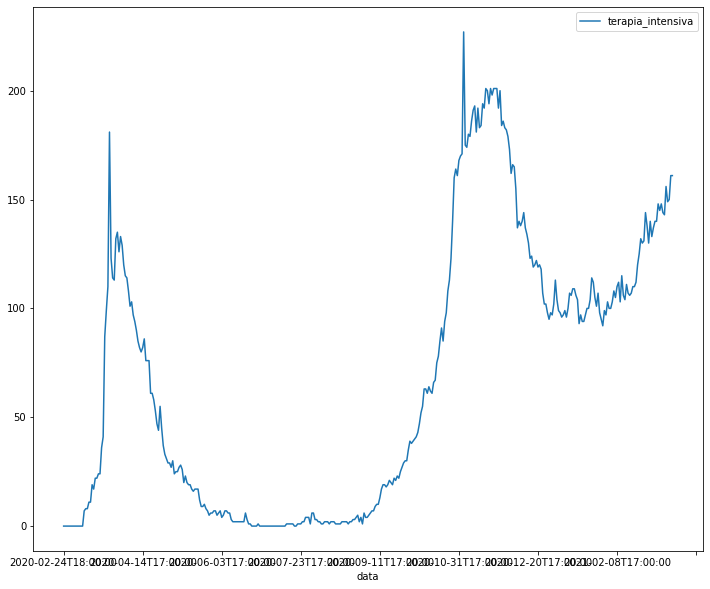

In [54]:
plt.figure()
df_campania.plot(x='data',y='terapia_intensiva',figsize=(12,10))

Manipolazione delle date

In [55]:
df['data']

0       2020-02-24T18:00:00
1       2020-02-24T18:00:00
2       2020-02-24T18:00:00
3       2020-02-24T18:00:00
4       2020-02-24T18:00:00
               ...         
8101    2021-03-15T17:00:00
8102    2021-03-15T17:00:00
8103    2021-03-15T17:00:00
8104    2021-03-15T17:00:00
8105    2021-03-15T17:00:00
Name: data, Length: 8106, dtype: object

In [56]:
df['data_dt'] = pd.to_datetime(df['data'])

In [57]:
df[['data', 'data_dt']]

,data,data_dt
0,2020-02-24T18:00:00,2020-02-24 18:00:00
1,2020-02-24T18:00:00,2020-02-24 18:00:00
2,2020-02-24T18:00:00,2020-02-24 18:00:00
3,2020-02-24T18:00:00,2020-02-24 18:00:00
4,2020-02-24T18:00:00,2020-02-24 18:00:00
...,...,...
8101,2021-03-15T17:00:00,2021-03-15 17:00:00
8102,2021-03-15T17:00:00,2021-03-15 17:00:00
8103,2021-03-15T17:00:00,2021-03-15 17:00:00
8104,2021-03-15T17:00:00,2021-03-15 17:00:00


In [58]:
day_1 = df['data_dt'].min()

In [59]:
day_1

Timestamp('2020-02-24 18:00:00')

In [60]:
df['giorni'] = (df['data_dt'] - day_1).dt.days

In [61]:
df[['giorni', 'data_dt']]

,giorni,data_dt
0,0,2020-02-24 18:00:00
1,0,2020-02-24 18:00:00
2,0,2020-02-24 18:00:00
3,0,2020-02-24 18:00:00
4,0,2020-02-24 18:00:00
...,...,...
8101,384,2021-03-15 17:00:00
8102,384,2021-03-15 17:00:00
8103,384,2021-03-15 17:00:00
8104,384,2021-03-15 17:00:00


In [62]:
df_campania = df.loc[df1['denominazione_regione']=="Campania"]

In [63]:
df_campania[['giorni', 'data_dt']]

,giorni,data_dt
3,0,2020-02-24 18:00:00
24,1,2020-02-25 18:00:00
45,2,2020-02-26 18:00:00
66,3,2020-02-27 18:00:00
87,4,2020-02-28 18:00:00
...,...,...
8004,380,2021-03-11 17:00:00
8025,381,2021-03-12 17:00:00
8046,382,2021-03-13 17:00:00
8067,383,2021-03-14 17:00:00


<Figure size 432x288 with 0 Axes>

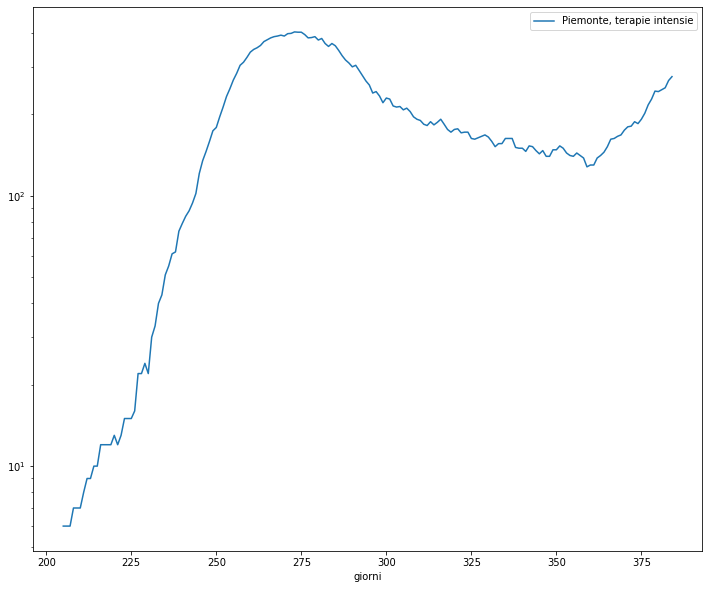

In [64]:
df_regione = df.loc[(df['denominazione_regione']=='Piemonte') & (df['giorni']>204)] 
plt.figure()
fig, ax = plt.subplots()
plt.yscale('log')
df_regione.plot(x='giorni',y='terapia_intensiva', ax=ax, figsize=(12,10), label='Piemonte, terapie intensie')

# Spunti per esercizi

* usando lo stesso dataframe del Dipartimento della Protezione Civile, fare grafici delle seguenti quantità:
    * totale positivi in Campania (o una regione che preferite) in funzione della data
    * positivi giornalieri in Campania in funzione della data
    * media mobile a 7 giorni dei positivi giornalieri in Campania in funzione della data
    * distribuzione del numero di decessi totale per regione ad oggi
    * distribuzione del numero di positivi giornalieri rispetto al numero di tamponi fatti in funzione della data
    * ...

* creare un data frame con la propria agenda telefonica.

*Hint* usare tutorial e guide in rete su come creare un DataFrame da zero. Ad esempio [questo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

* creare un data frame con i risultati del calendario di serie A e da questo determinare la classifica.

*Hint*: alcuni dati si possono trovare [qui](https://www.kaggle.com/massibelloni/serie-a-19932017) oppure [qui](https://www.football-data.co.uk/italym.php) in formato CSV. Il significato degli acronimi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html).

* Variazione sul tema: creare un data frame con il numero di rigori per stagione di ciascuna squadra e graficare l'andamento negli anni

*Hint*: le statistiche sui rigori ricevuti si trovano su <a href="https://www.transfermarkt.it/serie-a/topErhalteneElfmeter/wettbewerb/IT1/plus/?saison_id=2018">transfermarkt</a>. Ma non sono scaricabili in CSV. <a href="https://www.kaggle.com/emilerichard/penalty-statistics-20192020">qui</a> c'è il file per il 2019-2020.

Altri esempi di dataset si possono trovare nei seguenti repositories:
* <a href="https://datasetsearch.research.google.com/">Google dataset search</a>
* <a href="https://www.kaggle.com/">Kaggle</a>
* <a href="https://archive.ics.uci.edu/ml/index.php">Machine learning repository</a>
* <a href="https://datahub.io/">DataHub</a>
* <a href="https://data.humdata.org/dataset">HDX</a>

<span style="color: gray">Si ringrazia G. Bonifazi per le fonti citate sopra.</span>